In [1]:
import numpy as np
import h5py
from math import pi
import matplotlib.pyplot as plt

In [2]:
# given a 1-D array, returns a list with the unique values from the array
def get_unique(arr, start, step):
    unique = []
    i = start
    while i < len(arr):
        if len(unique) < 1:
            unique.append(arr[i])
        else:
            diff = 0
            for j in unique:
                if np.abs(j - arr[i]) > 1e-6:
                    diff += 1
            if diff == len(unique):
                unique.append(arr[i])
        i += step
    return unique

In [3]:
# given two lists of values, adds value a from list2 to list1 if a was not already present in list1
def add_unique(list1, list2):
    unique = list1
    for i in list2:
        if len(unique) < 1:
            unique.append(i)
        else:
            diff = 0
            for j in unique:
                if np.abs(j - i) > 1e-6:
                    diff += 1
            if diff == len(unique):
                unique.append(i)
    return unique

In [20]:
bif = []
count = 0
fname = '../data/7-9-20_1/data.h5'
with h5py.File(fname, 'r') as f:
    A = 0.0
    for i in range(500):
        unique_thetas = []
        group = "group" + str(i)
        dset = f[group]
        for j in range(500):
            data = dset['dset' + str(j)]
            NY = int(len(data)/3)
            data = np.reshape(data, (3, NY))
            y_vals = get_unique(data[2], 2, 1)
            unique_thetas = add_unique(unique_thetas, y_vals)
        bif.append([A, unique_thetas])
        A += 0.0001
        if count % 50 ==0:
            print(count)
        count += 1

0
50
100
150
200
250
300
350
400
450


In [21]:
As = []
vals = []
for i in range(len(bif)):
    for j in range(len(bif[i][1])):
        As.append(bif[i][0])
        vals.append(bif[i][1][j])

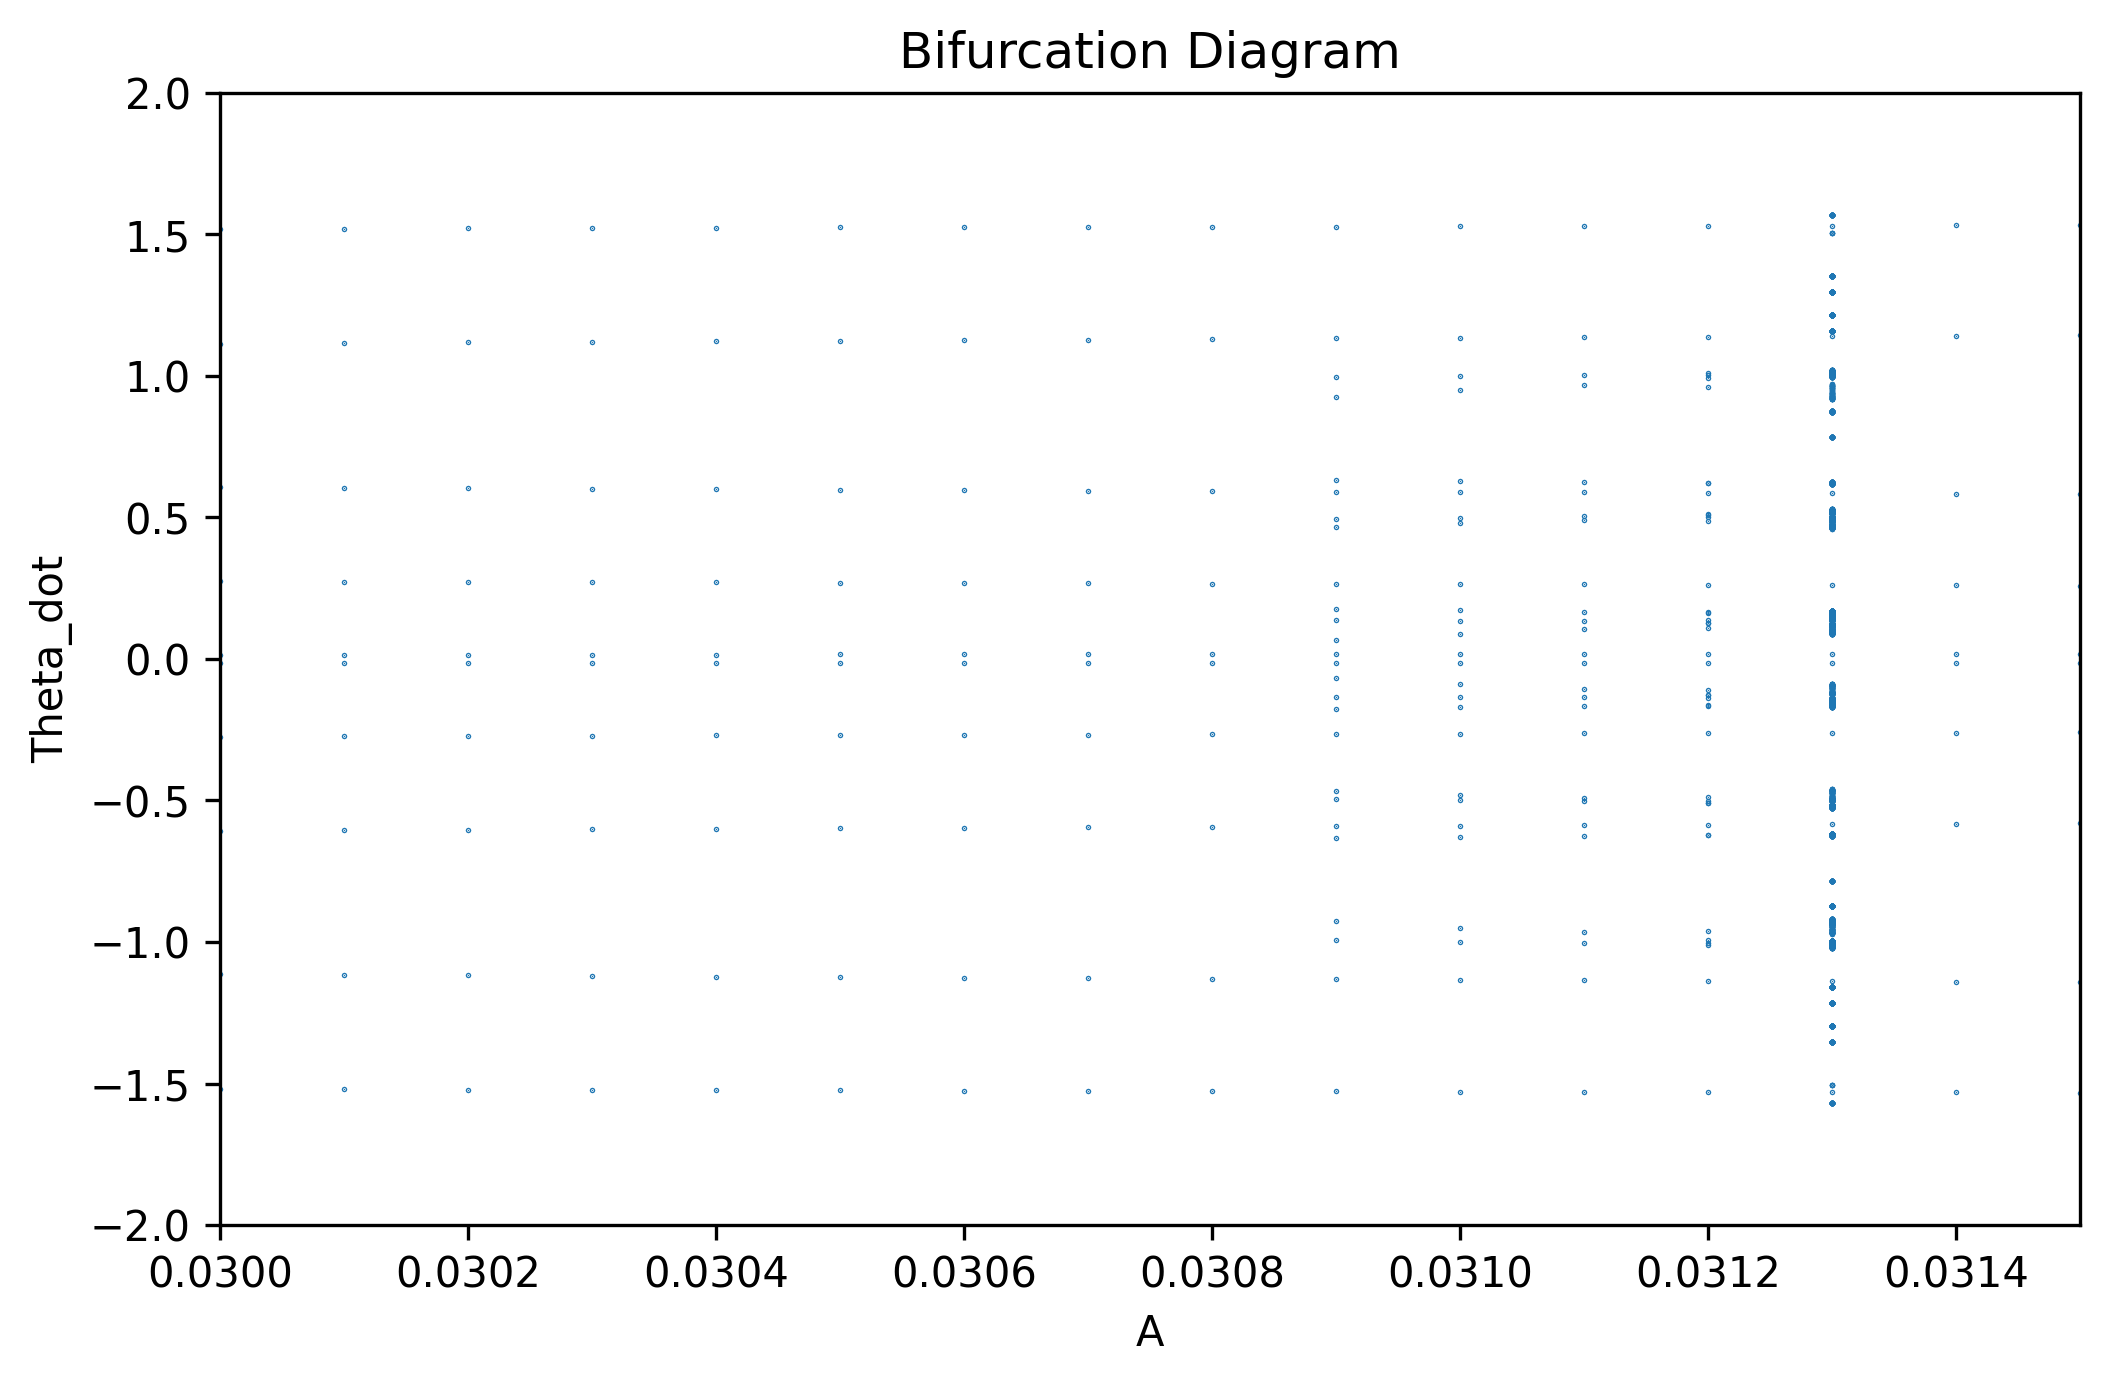

In [29]:
fig = plt.figure(figsize=(8, 5), dpi=300)
ax = fig.add_subplot(111)
ax.scatter(As, vals, s=0.1)
ax.set_title('Bifurcation Diagram')
ax.set_xlabel('A')
ax.set_ylabel('Theta_dot')
ax.set_xlim(0.03, 0.0315)
ax.set_ylim(-2,2)
plt.show()